In [323]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [324]:
whale_df = pd.read_csv(Path("/Users/ejbraggs/Desktop/Module-4-Challenge/M4_Starter_Code/Resources/whale_navs.csv"), 
                      index_col="date",
                      parse_dates=True,
                      infer_datetime_format=True)

In [325]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [326]:
daily_returns = whale_df.pct_change().dropna()

<AxesSubplot:xlabel='date'>

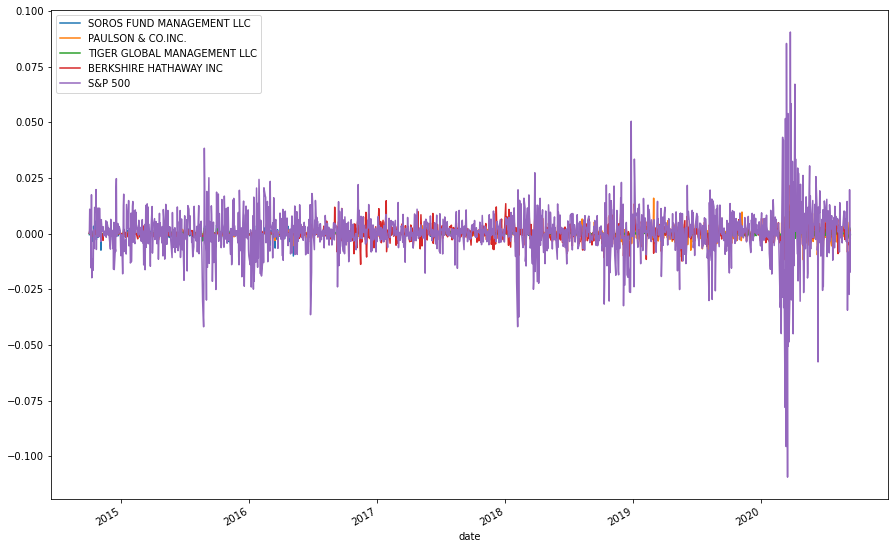

In [327]:
daily_returns.plot(figsize=(15,10))

## Analyzing the performance

In [328]:
(1 + daily_returns).cumprod().tail

<bound method NDFrame.tail of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
date                                                       
2014-10-02                   0.999558           1.000150   
2014-10-03                   1.000609           1.000518   
2014-10-06                   1.003066           1.000510   
2014-10-07                   1.000437           1.000193   
2014-10-08                   1.000828           1.000563   
...                               ...                ...   
2020-09-04                   0.987355           0.958187   
2020-09-08                   0.985640           0.956378   
2020-09-09                   0.986739           0.958409   
2020-09-10                   0.985498           0.959740   
2020-09-11                   0.985086           0.957887   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  
date                                                                       
2014-10-02                     1.0000

In [329]:
cumlative_returns = (1 + daily_returns).cumprod()

<AxesSubplot:title={'center':'Box Plot of Cumlative Returns Data - 5 Tech Stocks'}, xlabel='date'>

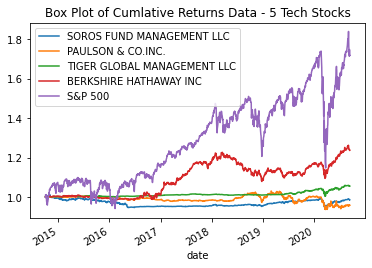

In [330]:
cumlative_returns.plot(title="Box Plot of Cumlative Returns Data - 5 Tech Stocks")

Berkshire Hataway out performs the S&P 500 index, but only by a small amount for a small amount of time.

## Analyzing the volatility

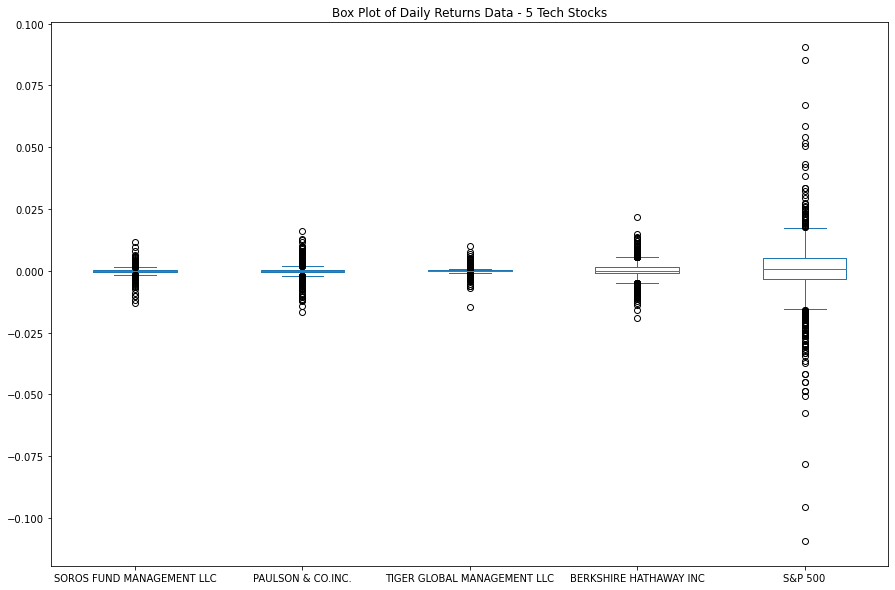

In [331]:
daily_df = daily_returns.plot.box(title="Box Plot of Daily Returns Data - 5 Tech Stocks", figsize=(15,10))

In [332]:
drop_sp = daily_returns.drop(columns = 'S&P 500')

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - No S&P'}>

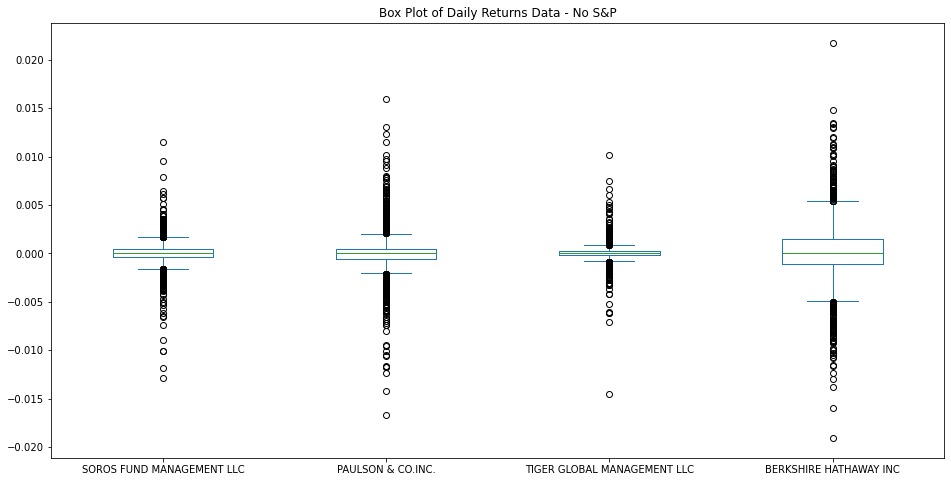

In [333]:
drop_sp.plot.box(title="Box Plot of Daily Returns Data - No S&P", figsize=(16,8))

In [334]:
# Berkshire has is more volatile & Tiger global management inc. has the least amount of volatility

## Analyzing the risk

In [353]:
standard_daily = daily_returns.std().sort_values()

In [354]:
daily_returns.std().sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [355]:
standard_drop = drop_sp.std().sort_values()

In [356]:
drop_sp.std().sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
dtype: float64

In [366]:
annual_standard = standard_daily * np.sqrt(252) # annualized standard deviation for S&P 500

In [367]:
standard_daily * np.sqrt(252)

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

In [362]:
annual_drop = standard_drop * np.sqrt(252) #annualized standard deviation for everything else

In [364]:
standard_drop * np.sqrt(252)

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
dtype: float64

<AxesSubplot:title={'center':'Plot of Standard Deviation Returns - No S&P 500'}, xlabel='date'>

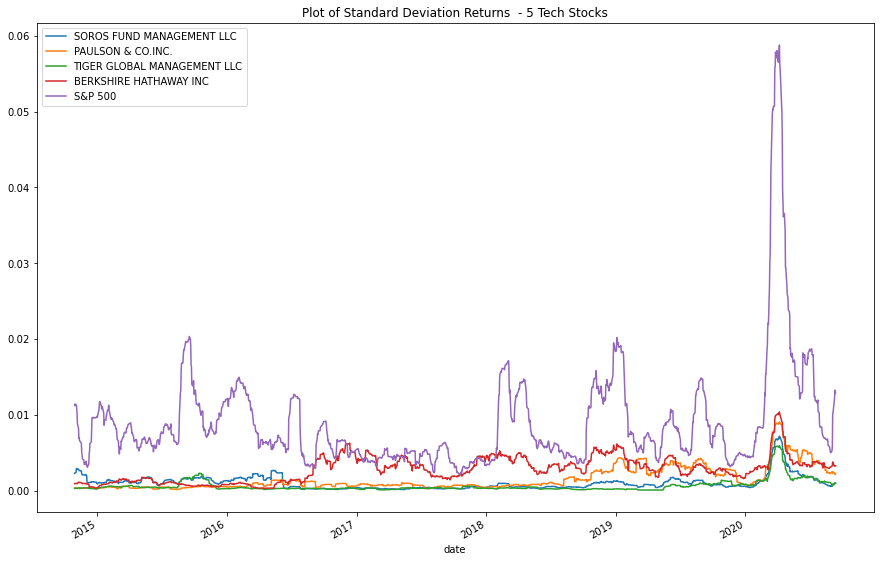

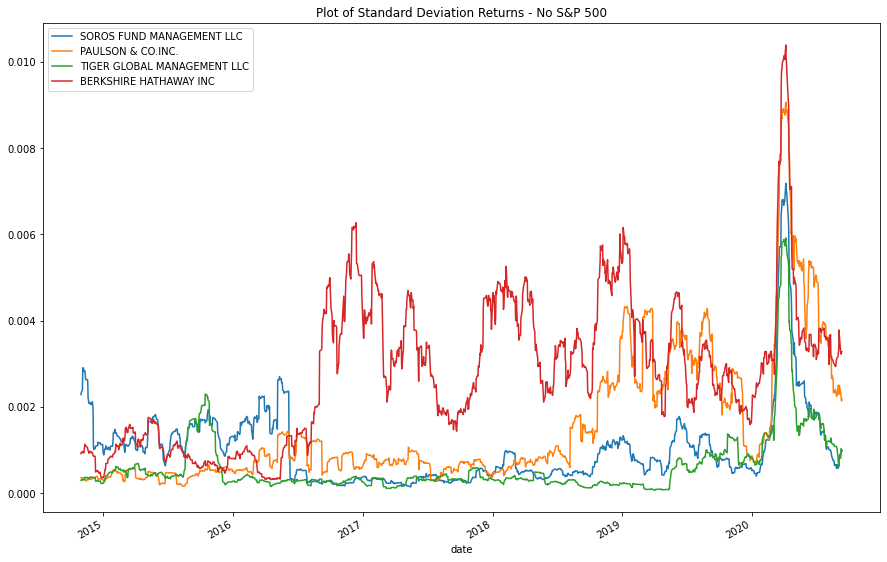

In [359]:
daily_returns.rolling(21).std().plot(title="Plot of Standard Deviation Returns  - 5 Tech Stocks", figsize=(15,10))
drop_sp.rolling(21).std().plot(title="Plot of Standard Deviation Returns - No S&P 500", figsize=(15,10))

In [342]:
# Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?
    # None of the portfolio seem to pose more risk than the S&P 500

In [343]:
# Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?
    # Yes. Based on the rolling metrics each portfolio seems to have an increased risk at the same time as the S&P 500 risk rises.

In [344]:
# Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?
    # Berkshire Hathaway poses the most risk from late 2016 to about early 2020. It does change a bit, after 2020 the other 4 start to pose the same risk that was BH has.

## Annualized Average Return

In [350]:
annual_avg_return = daily_returns.mean().sort_values() * 252

In [351]:
daily_returns.mean().sort_values() * 252

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [385]:
sharpe_ratio = annual_avg_return / annual_standard
sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Plot of Standard Deviation Returns - No S&P 500'}>

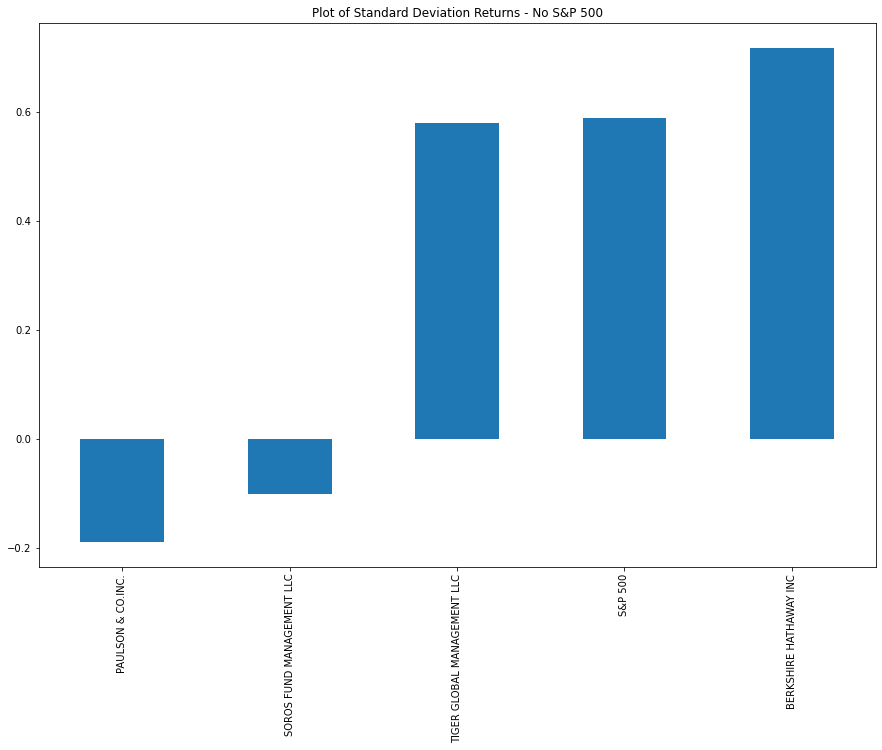

In [394]:
sharpe_ratio.sort_values().plot.bar(title="Plot of Standard Deviation Returns - S&P 500", figsize=(15,10))

In [ ]:
# Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    # Bershire Hataway offers the best risk-return profile & Paulston & Co offers the worst risk-return profile

In [442]:
sp_var = daily_returns['S&P 500'].rolling(60).var().dropna().tail()

In [443]:
sp_var.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

## 60 Day rolling compare

In [468]:
sp_cov = daily_returns['S&P 500'].rolling(60).var().dropna()
sp_cov.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

## Portfolio 1

In [471]:
paul_cov = daily_returns['PAULSON & CO.INC.'].rolling(60).cov(daily_returns['S&P 500'])
paul_cov.dropna().tail()

date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [472]:
paul_beta = paul_cov / sp_var
paul_beta.dropna().tail()

date
2020-09-04    0.085217
2020-09-08    0.087760
2020-09-09    0.084976
2020-09-10    0.084373
2020-09-11    0.083657
dtype: float64

In [474]:
paul_avg = paul_beta.mean()
paul_avg

0.07767796326036529

<AxesSubplot:title={'center':'PAULSON & CO.INC. 60 day rolling beta'}, xlabel='date'>

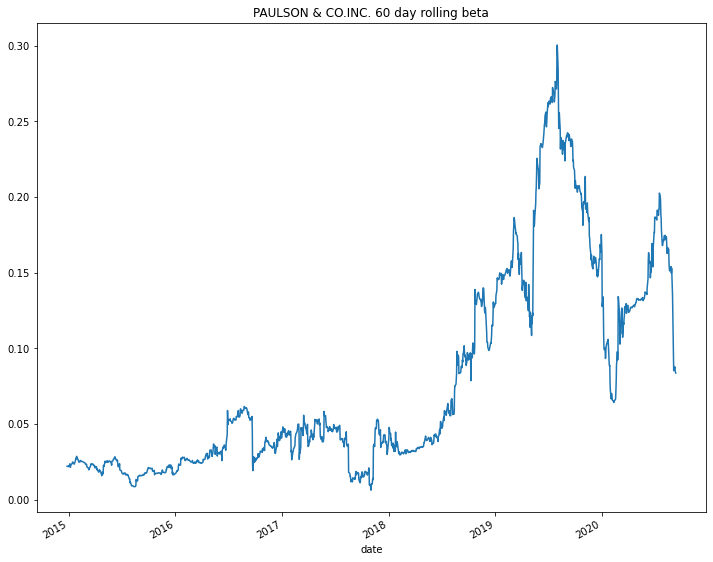

In [475]:
paul_beta.plot(title="PAULSON & CO.INC. 60 day rolling beta", figsize=(12,10))

## Portfolio 2

In [477]:
berk_cov = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(60).cov(daily_returns['S&P 500'])
berk_cov.dropna().tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [478]:
berk_beta = berk_cov / sp_var
berk_beta.dropna().tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [479]:
berk_avg = berk_beta.mean()
berk_avg

0.2214986101354593

<AxesSubplot:title={'center':'BERKSHIRE HATAWAY INC. 60 day rolling beta'}, xlabel='date'>

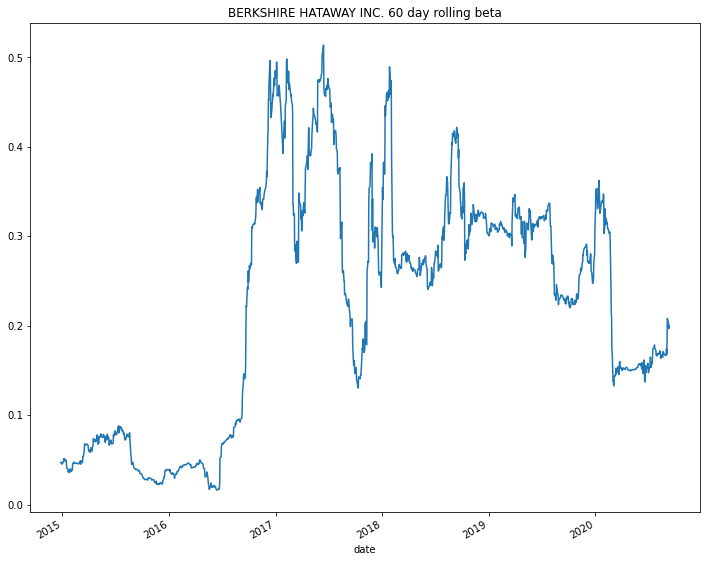

In [481]:
berk_beta.plot(title="BERKSHIRE HATAWAY INC. 60 day rolling beta", figsize=(12,10))

## Answer 1

Which of the two portfolios seem more sensitive to movements in the S&P 500?

Berkshire Hataway has a higher covariance w/ the S&P 500. Appears to be more sesntive than Paulson & Co.

## Answer 2

Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

I would recommend Berkshire for my firms fund offering. It has a much better risk management perspective. Also has a higher beta than Paul & Co. 